## Mitsiu Alejandro Carreño Sarabia - E23S-18014
 En el cuaderno quizá pudiste notar que algunas de las selecciones contenían parámetros.
           
Investiga cuales son estos parámetros, que significan para que sirven y si afecta los ejemplos que vimos. Presenta el parámetro cambiado, su valor y los resultados obtenidos de este cambio. Explica el razonamiento del cambio      


Los siguiente son ejemplos de parámetros:
* learning_rate para el optimizador Adam
* mean para el inicializador random normal
* rate para la capa dropout
* l1 y l2 para los regularizadores l1, l2 y l1l2


In [6]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


In [2]:
# Carga de datos
digits = datasets.load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)
#Escalar datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [3]:
from tensorflow import initializers

In [4]:
modelos = dict()
inicializadores = {
    "Default": initializers.RandomNormal(seed=2023),
    "mean 10": initializers.RandomNormal(seed=2023, mean=10),
    "mean 100": initializers.RandomNormal(seed=2023, mean=100),
    "stddev 10": initializers.RandomNormal(seed=2023, stddev=10),
    "stddev 100": initializers.RandomNormal(seed=2023, stddev=100),
    "mean 10 stddev 10": initializers.RandomNormal(seed=2023, mean=10, stddev=10),
}

for inicializador in inicializadores:
    model = keras.Sequential([
        keras.layers.Input(shape=(64,)),
        keras.layers.Dense(128, activation='relu', kernel_initializer = inicializadores[inicializador]),
        keras.layers.Dense(10, activation='softmax', kernel_initializer = inicializadores[inicializador])
    ])
    
    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    
    print(inicializador)
    modelos[inicializador] = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

Default
mean 10
mean 100
stddev 10
stddev 100
mean 10 stddev 10


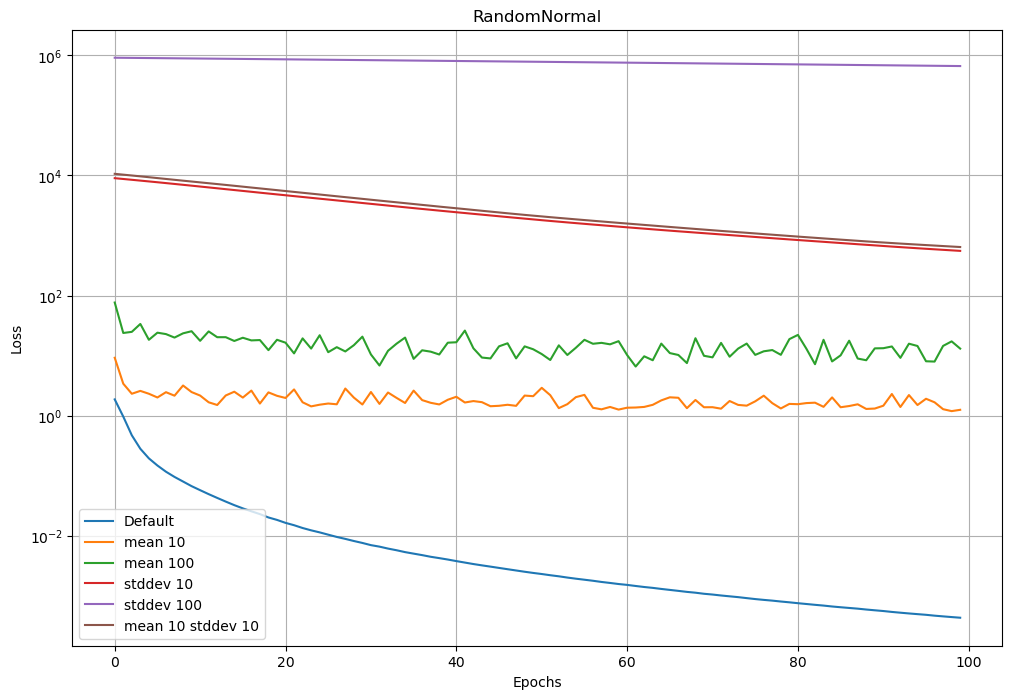

In [20]:
plt.figure(figsize=(12,8))
for llave in modelos:
    plt.semilogy(modelos[llave].history["loss"], label=llave)
    
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("RandomNormal")
plt.legend()
plt.grid(True)

# Dropout

In [8]:
X, y = datasets.make_moons(n_samples=200, noise=0.3, random_state=123)

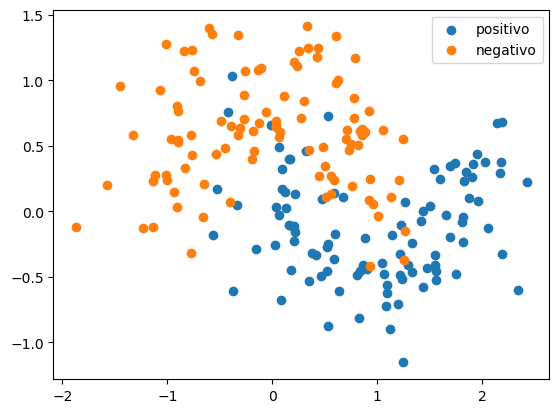

In [9]:
plt.scatter(X[y==1,0], X[y==1,1], label="positivo")
plt.scatter(X[y==0,0], X[y==0,1], label="negativo")
plt.legend()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [30]:
modelos = dict()
dropouts = {
    "0.1": keras.layers.Dropout(0.1),
    "0.4": keras.layers.Dropout(0.4),
    "0.9": keras.layers.Dropout(0.9),
    "0.999": keras.layers.Dropout(0.999),
}

for drop in dropouts:
    
    modelo_drop = keras.Sequential()
    modelo_drop.add(keras.layers.Dense(500, input_dim=2, activation="relu"))
    modelo_drop.add(dropouts[drop])
    modelo_drop.add(keras.layers.Dense(1, activation="sigmoid"))
    
    modelo_drop.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

    print(drop)
    modelos[drop] = modelo_drop.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, verbose=0)

0.1
0.4
0.9
0.999


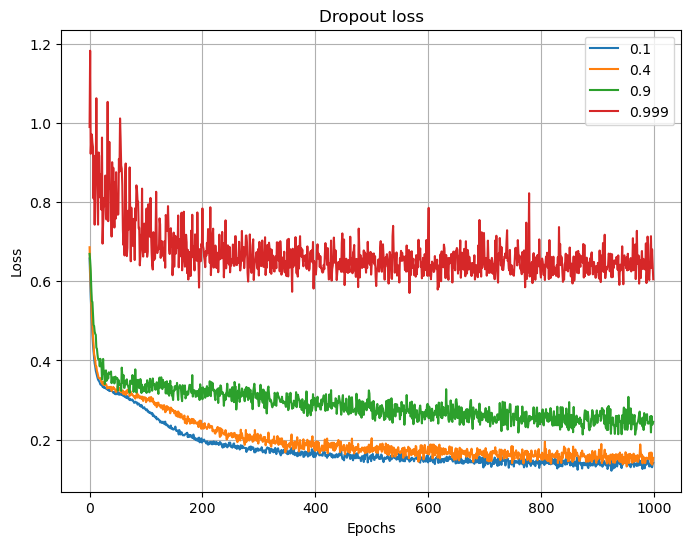

In [41]:
plt.figure(figsize=(8, 6))  # Adjust the figure size

for llave in modelos:
    plt.plot(modelos[llave].history["loss"], label=llave)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Dropout loss')
plt.legend()

plt.grid(True)

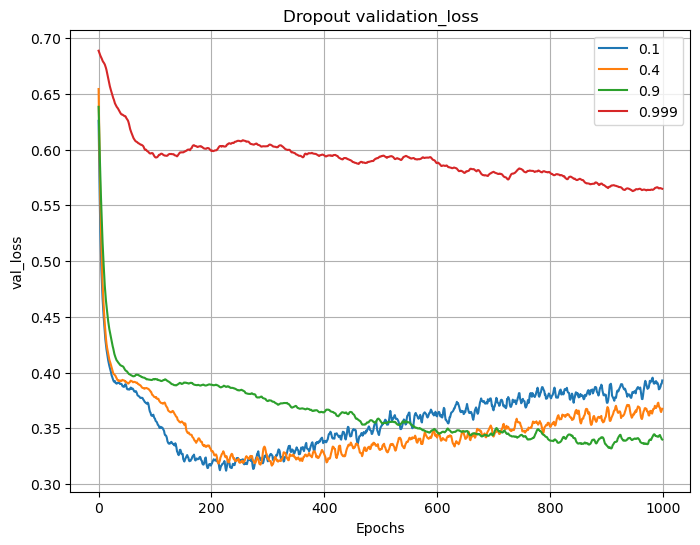

In [42]:
plt.figure(figsize=(8, 6))  # Adjust the figure size

for llave in modelos:
    plt.plot(modelos[llave].history["val_loss"], label=llave)

plt.xlabel('Epochs')
plt.ylabel('val_loss')
plt.title('Dropout validation_loss')
plt.legend()

plt.grid(True)

## Regularizadores

In [44]:
modelos = dict()
regularizers = {
    "L1 0.1": keras.regularizers.L1(0.1),
    "L1 0.001": keras.regularizers.L1(0.001),
    "L1 0.000000001": keras.regularizers.L1( 0.000000001),
    "L2 0.1": keras.regularizers.L2(0.1),
    "L2 0.001": keras.regularizers.L2(0.001),
    "L2 0.000000001": keras.regularizers.L2( 0.000000001),
    "L1L2 0.1": keras.regularizers.L1L2(0.1),
    "L1L2 0.001": keras.regularizers.L1L2(0.001),
    "L1L2 0.000000001": keras.regularizers.L1L2( 0.000000001),
}

for regul in regularizers:
    modelo = keras.Sequential()
    modelo.add(keras.layers.Dense(
        500, 
        input_dim=2, 
        activation="relu", 
        kernel_regularizer=regularizers[regul],
        bias_regularizer=regularizers[regul]
    ))
    modelo.add(keras.layers.Dense(
        1, 
        activation="sigmoid", 
        kernel_regularizer=regularizers[regul],
        bias_regularizer= regularizers[regul]
    ))
    
    modelo.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    
    print(regul)
    modelos[regul] = modelo.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, verbose=0)

L1 0.1
L1 0.001
L1 0.000000001
L2 0.1
L2 0.001
L2 0.000000001
L1L2 0.1
L1L2 0.001
L1L2 0.000000001


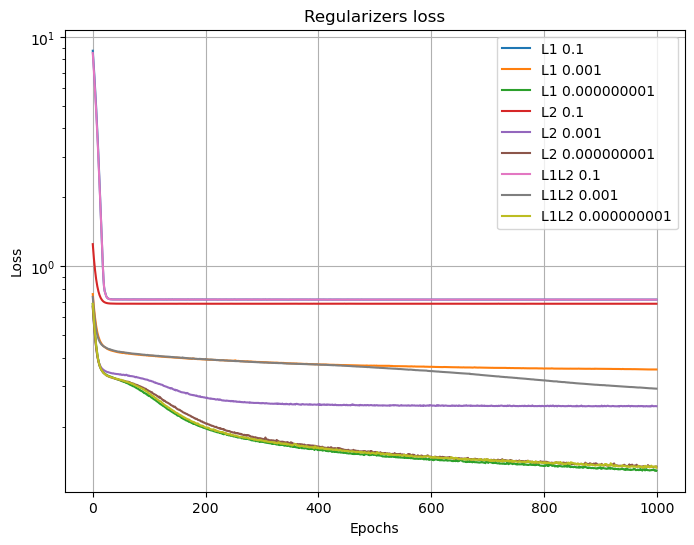

In [46]:
plt.figure(figsize=(8, 6))  # Adjust the figure size

for llave in modelos:
    plt.semilogy(modelos[llave].history["loss"], label=llave)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Regularizers loss')
plt.legend()

plt.grid(True)